In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_1167270d01c34b929321345b76d33939 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_1167270d01c34b929321345b76d33939 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_1167270d01c34b929321345b76d33939 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hechaM_RFkYm_MH3e5mmtSgiC76EJKaCXu0rlKZlglwr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_1167270d01c34b929321345b76d33939)

body = client_1167270d01c34b929321345b76d33939.get_object(Bucket='fooddemandforecasting-donotdelete-pr-m8wq8zgvfte9rz',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
train = pd.read_csv(body)
train.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [2]:

body = client_1167270d01c34b929321345b76d33939.get_object(Bucket='fooddemandforecasting-donotdelete-pr-m8wq8zgvfte9rz',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)
test.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [5]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [6]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [7]:

body = client_1167270d01c34b929321345b76d33939.get_object(Bucket='fooddemandforecasting-donotdelete-pr-m8wq8zgvfte9rz',Key='meal_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

meal_info = pd.read_csv(body)
meal_info.head()


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [8]:

body = client_1167270d01c34b929321345b76d33939.get_object(Bucket='fooddemandforecasting-donotdelete-pr-m8wq8zgvfte9rz',Key='fulfilment_center_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

center_info= pd.read_csv(body)
center_info.head()


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [9]:
trainfinal=pd.merge(train,meal_info,on="meal_id",how="outer")
trainfinal=pd.merge(trainfinal,center_info,on="center_id",how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [10]:
trainfinal=trainfinal.drop(["center_id","meal_id"],axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [11]:
cols=trainfinal.columns.tolist()
cols

['id',
 'week',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'category',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area']

In [12]:
cols=cols[:2]+cols[9:]+cols[7:9]+cols[2:7]
cols

['id',
 'week',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders']

In [13]:
trainfinal=trainfinal[cols]
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lb1=LabelEncoder()
trainfinal["center_type"]=lb1.fit_transform(trainfinal["center_type"])
lb2=LabelEncoder()
trainfinal["category"]=lb1.fit_transform(trainfinal["category"])
lb3=LabelEncoder()
trainfinal["cuisine"]=lb1.fit_transform(trainfinal["cuisine"])

In [16]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


In [17]:
trainfinal.shape

(456548, 13)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'number_orders Distribution')

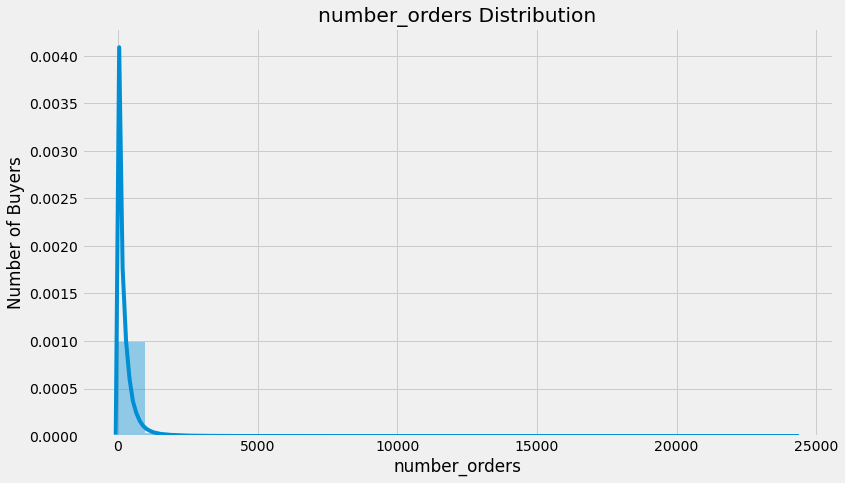

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders,bins=25)
plt.xlabel("number_orders")
plt.ylabel("Number of Buyers")
plt.title("number_orders Distribution")

In [19]:
trainfinal2=trainfinal.drop(['id'],axis=1)
correlation=trainfinal2.corr(method='pearson')
columns=correlation.nlargest(8,'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

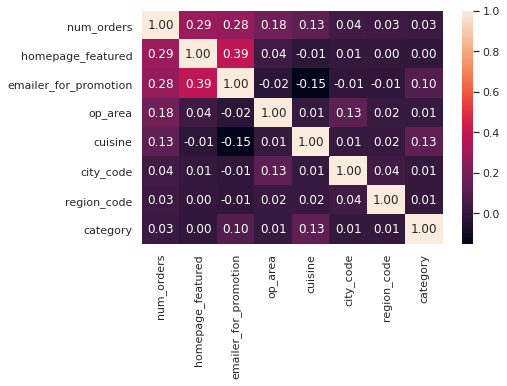

In [20]:
correlation_map=np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap=sns.heatmap(correlation_map,cbar=True,annot=True,fmt='.2f',yticklabels=columns.values,xticklabels=columns.values)
plt.show()

In [21]:
features=columns.drop(['num_orders'])
trainfinal3=trainfinal[features]
x=trainfinal3.values
y=trainfinal['num_orders'].values
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25)

In [23]:
from sklearn. linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn. linear_model import ElasticNet
from sklearn. tree import DecisionTreeRegressor

from sklearn. neighbors import KNeighborsRegressor
from sklearn. ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor



In [24]:
xg=XGBRegressor()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 68.93997183947863


In [26]:
#model_id

In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_val,y_pred)))

RMSLE: 129.9480122557156


In [28]:
L = Lasso()
L. fit(x_train, y_train)

y_pred = L.predict(x_val)
y_pred[y_pred<0] =0
from sklearn import metrics
print('RMSLE: ', 100*np. sqrt(metrics. mean_squared_log_error(y_val, y_pred)))


RMSLE:  129.4457162527747


In [29]:
EN = ElasticNet()
EN. fit(x_train, y_train)
y_pred = EN.predict(x_val)

y_pred[y_pred<0] = 0
from sklearn import metrics
print( 'RMSLE: ', 100*np. sqrt(metrics.mean_squared_log_error(y_val, y_pred) ))


RMSLE:  131.0682612922641


In [30]:
DT = DecisionTreeRegressor()
DT. fit(x_train, y_train)
y_pred = DT. predict (x_val)

y_pred[y_pred<0] = 0
from sklearn import metrics
print( 'RMSLE: ', 100*np. sqrt(metrics.mean_squared_log_error(y_val, y_pred) ))


RMSLE:  62.86158607260369


In [31]:
DT.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor()>

In [32]:
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print('RMSLE: ', 100*np. sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE:  66.69572053895104


In [33]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
y_pred=GB.predict(x_val)
y_pred[y_pred<0]=0
from sklearn import metrics
print( 'RMSLE: ', 100*np. sqrt(metrics.mean_squared_log_error(y_val, y_pred) ))

RMSLE:  94.9350741929311


In [34]:
testfinal = pd. merge(test, meal_info, on="meal_id", how="outer")
testfinal= pd. merge(testfinal, center_info, on="center_id", how="outer")
testfinal=testfinal. drop([ 'meal_id', 'center_id'], axis=1)

tcols = testfinal. columns . tolist()
print(tcols)
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols ]
lb1 = LabelEncoder ()
testfinal[ 'center_type '] = lb1. fit_transform(testfinal[ 'center_type'])

lb2 = LabelEncoder()
testfinal['category'] = lb1. fit_transform(testfinal['category'])
lb3 = LabelEncoder()
testfinal[ 'cuisine ' ]=lb1. fit_transform(testfinal[ 'cuisine'])
testfinal.head()
x_test = testfinal[features] . values


['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [35]:
features

Index(['homepage_featured', 'emailer_for_promotion', 'op_area', 'cuisine',
       'city_code', 'region_code', 'category'],
      dtype='object')

In [ ]:
pred=DT.predict(x_test)
pred[pred<0]=0
submit=pd.DataFrame({'id':testfinal['id'],'num_orders':pred})

In [ ]:
submit.to_csv("submission.csv",index=False)
submit.describe()

In [38]:
import pickle
pickle.dump(DT,open('fdemand.pkl','wb'))

In [39]:
!pip install ibm_watson_machine_learning

In [40]:
from ibm_watson_machine_learning import APIClient
wml_credentials={"url":"https://us-south.ml.cloud.ibm.com",
                "apikey":"hCMz6CxbIjqc0zt22E-RcxZE6_TY9D9i9jY-w-ga2nGW"
                }
client=APIClient(wml_credentials)

In [41]:
def space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [42]:
space_uid=space_name(client,'models')
print("Space UID-"+space_uid)

Space UID-f43fe1d6-6baf-40fa-92c2-ef20c0f91b42


In [43]:
client.set.default_space(space_uid)

'SUCCESS'

In [44]:
software_spec_uid=client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [45]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [46]:
model_details=client.repository.store_model(model=lr,meta_props={
    client.repository.ModelMetaNames.NAME:"food",
    client.repository.ModelMetaNames. TYPE:"scikit-learn_0.23",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
    
})
model_id=client.repository.get_model_uid(model_details)

Failure during scoring. (POST https://us-south.ml.cloud.ibm.com/ml/v4/deployments/09a04c27-91d1-4cb3-8be9-fd567865ce20/predictions?version=2021-06-24)
Status code: 400, body: {"trace": "81e6430eb699e297e2ba9cba0330450c", "errors": [{"code": "score_processing_failure", "message": "could not convert string to float: 'Thai'"}], "status_code": 400}



In [47]:
MODEL_NAME = 'FoodModel'
DEPLOYMENT_NAME = 'food_deploy'
Food_MODEL = DT

In [48]:
software_spec=client.software_specifications.get_uid_by_name("default_py3.8")

In [49]:
software_spec

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [50]:
# Set Python Version
software_spec_uid = client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}


In [52]:
#Save model
model_details = client.repository.store_model(
    model=Food_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [53]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194',
   'name': 'default_py3.8'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'}],
     'id': '1',
     'type': 'ndarray'},
    'type': 's3'}],
  'type': 'scikit-learn_0.23'},
 'metadata': {'created_at': '2022-01-21T10:34:45.332Z',
  'id': '7baa32b2-332a-44fd-bf97-cce155af4b92',
  'modified_at': '2022-01-21T10:34:47.430Z',
  'name': 'FoodModel',
  'owner': 'IBMid-6610036HHH',
  'resource_key': '257a7007-df88-499a-b5

In [54]:
model_uid = client.repository.get_model_uid(model_details); model_uid

'7baa32b2-332a-44fd-bf97-cce155af4b92'

In [55]:
client.connections.list_datasource_types()

-------------------------  ------------------------------------  --------  ------
NAME                       DATASOURCE_ID                         TYPE      STATUS
informix                   029e5d1c-ba73-4b09-b742-14c3a39b6cf9  database  active
postgresql-ibmcloud        048ed1bf-516c-46f0-ae90-fa3349d8bc1c  database  active
googlecloudstorage         05b7f0ea-6ae4-45e2-a455-cc280f110825  file      active
impala                     05c58384-862e-4597-b19a-c71ea7e760bc  database  active
salesforce                 06847b16-07b4-4415-a924-c63d11a17aa1  database  active
datastax-ibmcloud          0bd5946b-6fcb-4253-bf76-48b362d24a89  database  active
cosmos                     0c431748-2572-11ea-978f-2e728ce88125  file      active
odbc-datastage             0ca92c3d-0e46-3b42-a573-77958d53c9be  database  active
mysql-compose              0cd4b64c-b485-47ed-a8c4-329c25412de3  database  active
hive                       0fd83fe5-8995-4e2e-a1be-679bb8813a6d  database  active
cognos-analytics

In [56]:
# Set meta
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}


In [57]:
# Deploy
deployment = client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)




#######################################################################################

Synchronous deployment creation for uid: '7baa32b2-332a-44fd-bf97-cce155af4b92' started

#######################################################################################


initializingNote: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='09a04c27-91d1-4cb3-8be9-fd567865ce20'
------------------------------------------------------------------------------------------------




In [ ]:
deployment_uid = client.deployments.get_uid(deployment)
payload = {"input_data":
           [
               {"fields":x_test.tolist(), "values":x_test.tolist()}
           ]
          }
result = client.deployments.score(deployment_uid, payload); result

In [ ]:
payload